<a href="https://colab.research.google.com/github/RandomSebas/WomHackaton2023UD/blob/main/WomAnaliticadeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-Requisitos para ejecucion**



In [ ]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import tensorflow as tp
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import files

**Elegir solo una de las 2 opciones para iniciar el google collab, este cuadernillo no fue testeado en jupyter y tampoco fue testeada la opcion numero 2 por ende es recomendado correr este cuadernillo en collab y seguir las instrucciones de la opcion 1**



# **Opcion 1: Montar por Drive**
En el drive donde esta la cuenta del collab subir en una carpeta llamada hackatonwom los archivos del zip "hackatonwo.zip"

In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cargar Archivos y Definir Variables Iniciales**

In [240]:
carpetadrive = '/content/drive/MyDrive/hackatonwom/'
excelbase = 'Hackaton_Base_Line_Celdas_Wom.xlsx'
excelmetadata = "Metadata.xlsx"
parquetcapacidaddeceldas = "cell_capacity_wom_pm.parquet"
parquetkpitotal = "Data_KPI_Total/cell_kpi_wom_pm.parquet"
rutacompletaexcelbase = carpetadrive + excelbase
rutacompletaexcelmetadata = carpetadrive + excelmetadata
rutacompletaparquetceldas = carpetadrive + parquetcapacidaddeceldas
rutacompletaparquetkpitotal = carpetadrive + parquetkpitotal
tablaparquetceldas = pq.read_table(rutacompletaparquetceldas)
tablaparquetkpitotal = pq.read_table(rutacompletaparquetkpitotal)
dfexcel = pd.read_excel(rutacompletaexcelbase)
dfexcelmetadata = pd.read_excel(rutacompletaexcelmetadata)
dfpqcells = tablaparquetceldas.to_pandas()
dfpqkpitotal = tablaparquetkpitotal.to_pandas()

# **Opcion 2: Cargar el zip llamado "hackatonwom.zip"**

In [ ]:
uploaded = files.upload()

In [ ]:
import zipfile
import os

archivo_zip = 'hackatonwom.zip'  # Reemplaza 'nombre_del_archivo.zip' con el nombre real

ruta_destino = './hackatomwom'  # Carpeta donde se extraerán los archivos
os.makedirs(ruta_destino, exist_ok=True)

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(ruta_destino)

print('Contenido del ZIP extraído en:', ruta_destino)

**Cargar Archivos y Definir Variables Iniciales**

In [ ]:
carpetadrive = '/content/hackatonwom'
excelbase = 'Hackaton_Base_Line_Celdas_Wom.xlsx'
excelmetadata = "Metadata.xlsx"
parquetcapacidaddeceldas = "cell_capacity_wom_pm.parquet"
parquetkpitotal = "Data_KPI_Total/cell_kpi_wom_pm.parquet"
rutacompletaexcelbase = carpetadrive + excelbase
rutacompletaexcelmetadata = carpetadrive + excelmetadata
rutacompletaparquetceldas = carpetadrive + parquetcapacidaddeceldas
rutacompletaparquetkpitotal = carpetadrive + parquetkpitotal
tablaparquetceldas = pq.read_table(rutacompletaparquetceldas)
tablaparquetkpitotal = pq.read_table(rutacompletaparquetkpitotal)
dfexcel = pd.read_excel(rutacompletaexcelbase)
dfexcelmetadata = pd.read_excel(rutacompletaexcelmetadata)
dfpqcells = tablaparquetceldas.to_pandas()
dfpqkpitotal = tablaparquetkpitotal.to_pandas()

# **Visualizacion de datas frames iniciales**

In [ ]:
dfpqcells

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,Avg User Downlink Throughput (kbit/s),Avg PRB Downlink Usage (%),Avg Active User Downlink
22,2023-07-23 22:00:00-281349,281349,1099,5,2023-07-23 22:00:00,2023-07-23,22:00,5771.93,6.49,0.064
36,2023-07-24 12:00:00-281349,281349,1099,5,2023-07-24 12:00:00,2023-07-24,12:00,7336.77,10.18,0.097
61,2023-07-25 13:00:00-281349,281349,1099,5,2023-07-25 13:00:00,2023-07-25,13:00,5350.18,15.57,0.189
85,2023-07-26 13:00:00-281349,281349,1099,5,2023-07-26 13:00:00,2023-07-26,13:00,892.12,6.64,0.233
108,2023-07-27 12:00:00-281349,281349,1099,5,2023-07-27 12:00:00,2023-07-27,12:00,3356.66,6.90,0.057
...,...,...,...,...,...,...,...,...,...,...
555919,2023-07-31 20:00:00-320261,320261,1251,5,2023-07-31 20:00:00,2023-07-31,20:00,1388.30,96.67,8.988
555944,2023-08-01 21:00:00-320261,320261,1251,5,2023-08-01 21:00:00,2023-08-01,21:00,827.61,97.41,11.205
555968,2023-08-02 21:00:00-320261,320261,1251,5,2023-08-02 21:00:00,2023-08-02,21:00,808.59,97.62,12.878
555993,2023-08-03 22:00:00-320261,320261,1251,5,2023-08-03 22:00:00,2023-08-03,22:00,956.91,97.41,11.456


In [ ]:
dfpqkpitotal

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,L.Paging.Dis.Num (None),L.Paging.Dis.PagingTimeout (None),L.Paging.Dis.PchCong (None),...,L.Thrp.Time.Active.Cell.UL (ms),L.Thrp.Time.DL.RmvLastTTI.BorderUE (ms),L.Thrp.Time.DL.RmvLastTTI.BorderUE.JointTransmit (ms),L.Thrp.Time.DL.TrafficSizeBased (ms),L.Thrp.Time.UE.UL.Experienced (ms),L.Thrp.Time.UE.UL.FirstPktDelay (ms),L.Thrp.Time.UL.RmvSmallPkt.BorderUE (ms),L.Thrp.Time.UL.RmvSmallPkt.BorderUE.JointReception (ms),L.Thrp.Time.WBB.UL.Experienced (ms),L.Thrp.UL.FirstPktNum (packet)
0,2023-07-23 22:00:00-316676,316676,1237,4,2023-07-23 22:00:00,2023-07-23,22:00,0.0,0.0,0.0,...,0.0,0.0,0.0,9714924.0,4841277.0,0.0,0.0,0.0,0.0,0.0
1,2023-07-24 11:00:00-316676,316676,1237,4,2023-07-24 11:00:00,2023-07-24,11:00,0.0,0.0,0.0,...,0.0,0.0,0.0,12034111.0,5358227.0,0.0,0.0,0.0,0.0,0.0
2,2023-07-25 13:00:00-316676,316676,1237,4,2023-07-25 13:00:00,2023-07-25,13:00,0.0,0.0,0.0,...,0.0,0.0,0.0,9665696.0,6480733.0,0.0,0.0,0.0,0.0,0.0
3,2023-07-26 09:00:00-316676,316676,1237,4,2023-07-26 09:00:00,2023-07-26,09:00,0.0,0.0,0.0,...,0.0,0.0,0.0,7816143.0,5700958.0,0.0,0.0,0.0,0.0,0.0
4,2023-07-27 09:00:00-316676,316676,1237,4,2023-07-27 09:00:00,2023-07-27,09:00,0.0,0.0,0.0,...,0.0,0.0,0.0,8376116.0,6186483.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23176,2023-07-31 12:00:00-270341,270341,1056,5,2023-07-31 12:00:00,2023-07-31,12:00,0.0,0.0,0.0,...,0.0,0.0,0.0,1197539.0,1552021.0,0.0,0.0,0.0,0.0,0.0
23177,2023-08-01 21:00:00-270341,270341,1056,5,2023-08-01 21:00:00,2023-08-01,21:00,0.0,0.0,0.0,...,0.0,0.0,0.0,1037228.0,1794085.0,0.0,0.0,0.0,0.0,0.0
23178,2023-08-02 21:00:00-270341,270341,1056,5,2023-08-02 21:00:00,2023-08-02,21:00,0.0,0.0,0.0,...,0.0,0.0,0.0,1169806.0,2074742.0,0.0,0.0,0.0,0.0,0.0
23179,2023-08-03 14:00:00-270341,270341,1056,5,2023-08-03 14:00:00,2023-08-03,14:00,0.0,0.0,0.0,...,0.0,0.0,0.0,892657.0,1983928.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfexcel

,Cell Code,Site Code,Sector ID,Latitude,Longitude,Height,Azimuth,ET,MT,HBW,VBW,Max Power,EARFCN,Bandwidth,MCC,MNC,Band,City,Cluster
0,258823,1011,7,4.625846,-74.177726,26.0,350,6.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
1,258824,1011,8,4.625846,-74.177726,26.0,90,7.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
2,258825,1011,9,4.625846,-74.177726,26.0,210,7.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
3,259079,1012,7,4.610833,-74.184167,20.0,5,8.0,0,65,7.0,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
4,259080,1012,8,4.610833,-74.184167,20.0,135,12.0,0,65,7.0,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,325890,1273,2,5.313090,-72.399700,15.0,190,5.0,0,64,5.9,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1788,325891,1273,3,5.313090,-72.399700,15.0,280,4.0,0,64,5.9,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1789,326145,1274,1,5.350880,-72.382050,29.0,100,6.0,0,64,6.5,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1790,326146,1274,2,5.350880,-72.382050,29.0,190,5.0,0,64,6.5,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7


# **Comparativas y Graficos de Dispersion**

**Comparacion Avg User Downlink Throughput (kbit/s) vs Avg PRB Downlink Usage (%)**

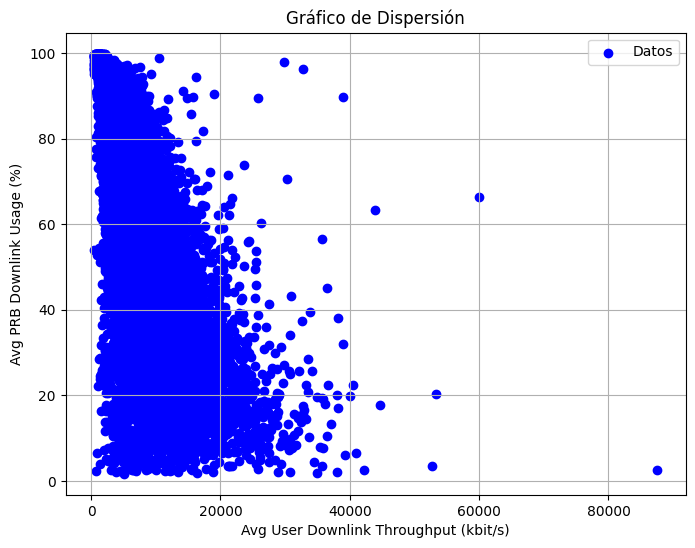

In [ ]:
indexdtpcolumnaaudt = 7  # Índice de la primera columna
indexdtpcolumnaprbdu = 8  # Índice de la segunda columna

dtpcolumnaaudt = dfpqcells.iloc[:, indexdtpcolumnaaudt]
dtpcolumnaprbdu = dfpqcells.iloc[:, indexdtpcolumnaprbdu]

plt.figure(figsize=(8, 6))
plt.scatter(dtpcolumnaaudt, dtpcolumnaprbdu, c='b', marker='o', label='Datos')
plt.xlabel('Avg User Downlink Throughput (kbit/s)')
plt.ylabel('Avg PRB Downlink Usage (%)')
plt.title('Gráfico de Dispersión')
plt.legend()
plt.grid(True)
plt.show()

**Comparacion Avg User Downlink Throughput (kbit/s) vs Avg Active User Downlink**

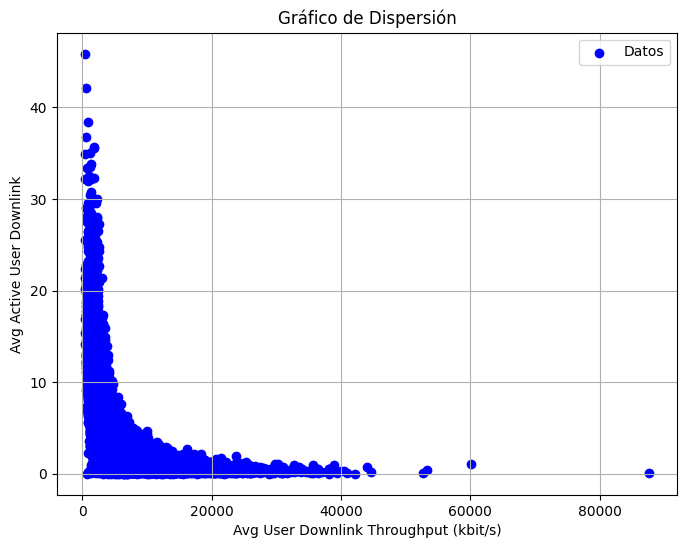

In [ ]:
#Comparacion Avg User Downlink Throughput (kbit/s) vs Avg Active User Downlink
indexdtpaaudg = 9


dtpcolumnaaaudg = dfpqcells.iloc[:, indexdtpaaudg]

plt.figure(figsize=(8, 6))
plt.scatter(dtpcolumnaaudt, dtpcolumnaaaudg, c='b', marker='o', label='Datos')
plt.xlabel('Avg User Downlink Throughput (kbit/s)')
plt.ylabel('Avg Active User Downlink')
plt.title('Gráfico de Dispersión')
plt.legend()
plt.grid(True)
plt.show()

**Histograma para ver como varia el Throughput**

In [ ]:
histograma1= px.histogram(dfpqcells, x=dtpcolumnaaudt)
histograma1.update_layout(
    title='Histograma de Throughput',
    xaxis_title='Valor',
    yaxis_title='Frecuencia'
)
histograma1

# **Filtros y Promedios (Reduccion de los valores)**

**Filtrar el throughput para mejor rendimiento**

In [ ]:
#filtro cellcode con thoughput >40000 (7)
valorfiltro1 = 20000
dffiltradothcc = dfpqcells[dfpqcells.iloc[:, 7] > valorfiltro1]
dffiltradothcc

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,Avg User Downlink Throughput (kbit/s),Avg PRB Downlink Usage (%),Avg Active User Downlink
5001,2023-07-23 09:00:00-269317,269317,1052,5,2023-07-23 09:00:00,2023-07-23,09:00,22551.83,6.92,0.056
5175,2023-07-30 15:00:00-269317,269317,1052,5,2023-07-30 15:00:00,2023-07-30,15:00,39304.56,6.13,0.085
7044,2023-07-30 12:00:00-269318,269318,1052,6,2023-07-30 12:00:00,2023-07-30,12:00,29129.95,8.21,0.111
13428,2023-07-23 12:00:00-269315,269315,1052,3,2023-07-23 12:00:00,2023-07-23,12:00,24926.09,16.15,0.203
13595,2023-07-30 11:00:00-269315,269315,1052,3,2023-07-30 11:00:00,2023-07-30,11:00,36442.88,10.60,0.129
...,...,...,...,...,...,...,...,...,...,...
548786,2023-08-02 15:00:00-323331,323331,1263,3,2023-08-02 15:00:00,2023-08-02,15:00,27512.17,31.89,0.616
548803,2023-08-03 08:00:00-323331,323331,1263,3,2023-08-03 08:00:00,2023-08-03,08:00,24393.59,33.76,0.645
548840,2023-08-04 21:00:00-323331,323331,1263,3,2023-08-04 21:00:00,2023-08-04,21:00,20747.18,27.12,0.654
548859,2023-07-23 16:00:00-260361,260361,1017,9,2023-07-23 16:00:00,2023-07-23,16:00,24375.51,56.16,1.226


**Promedio para sacar la muestra**

In [ ]:
promedio_avgudt = dfpqcells.iloc[:, 7].mean()
promedio_avgprb = dfpqcells.iloc[:, 8].mean()
promedio_avgacud = dfpqcells.iloc[:, 9].mean()
print(promedio_avgudt, promedio_avgprb, promedio_avgacud)

6205.2549424097315 69.9178318450455 3.7920503429532806


**Filtrar el excel por cell codes a partir del filtro previo el Throughput anterior**

In [ ]:
indexcc1 = 1
indexcc2 = 0

columnacc1 = dffiltradothcc.iloc[:, indexcc1]
columnacc2 = dfexcel.iloc[:, indexcc2]

valores_a_buscar = columnacc1.unique()

dffiltro2 = dfexcel[columnacc2.isin(valores_a_buscar)]

dffiltro2

,Cell Code,Site Code,Sector ID,Latitude,Longitude,Height,Azimuth,ET,MT,HBW,VBW,Max Power,EARFCN,Bandwidth,MCC,MNC,Band,City,Cluster
4,259080,1012,8,4.610833,-74.184167,20.0,135,12.0,0,65,7.0,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
49,265480,1037,8,4.618694,-74.199688,13.0,100,3.0,0,65,7.0,44.8,2950,10MHz,732,360,B7,City 1,Cluster 1
68,266761,1042,9,4.623560,-74.185210,13.0,220,10.0,0,63,6.5,41.0,2950,10MHz,732,360,B7,City 1,Cluster 1
72,267015,1043,7,4.598360,-74.186420,18.0,20,7.0,0,61,7.1,44.8,2950,10MHz,732,360,B7,City 1,Cluster 1
73,267016,1043,8,4.598360,-74.186420,18.0,210,8.0,0,61,7.1,44.0,2950,10MHz,732,360,B7,City 1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,325379,1271,3,5.334990,-72.395800,16.0,320,6.0,0,64,5.9,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1783,325633,1272,1,5.349660,-72.391400,18.0,70,6.0,0,64,6.5,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1789,326145,1274,1,5.350880,-72.382050,29.0,100,6.0,0,64,6.5,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1790,326146,1274,2,5.350880,-72.382050,29.0,190,5.0,0,64,6.5,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7


**Con el filtro anterior se reduce a cual es la mejor ciudad con el mejor throughput**

In [ ]:
columna_moda = 'City'
moda = dffiltro2[columna_moda].mode()

primer_moda = moda.iloc[0]
print("La moda de la columna '{}' es: {}".format(columna_moda, primer_moda))

La moda de la columna 'City' es: City 1


# **Hallar los valores optimos de los datos encontrando el mejor rendimiento de una pequeña muestra con respecto a lo encontrado con anterioridad**

**Dataframe de cells ordenado de menor a mayor**

In [ ]:
indexdtpcolumnaaudt = 7

if indexdtpcolumnaaudt >= 0 and indexdtpcolumnaaudt < dfpqcells.shape[1]:
    columna_orden = dfpqcells.columns[indexdtpcolumnaaudt]

    df_sorted = dfpqcells.sort_values(by=columna_orden, ascending=True, ignore_index=True)

else:
    print(f"El índice {indexdtpcolumnaaudt} está fuera del rango de columnas.")


In [ ]:
df_sorted

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,Avg User Downlink Throughput (kbit/s),Avg PRB Downlink Usage (%),Avg Active User Downlink
0,2023-07-25 17:00:00-325125,325125,1270,5,2023-07-25 17:00:00,2023-07-25,17:00,413.88,97.44,16.942
1,2023-08-02 20:00:00-289030,289030,1129,6,2023-08-02 20:00:00,2023-08-02,20:00,425.74,95.12,22.399
2,2023-08-03 20:00:00-281350,281350,1099,6,2023-08-03 20:00:00,2023-08-03,20:00,439.34,54.03,32.178
3,2023-07-30 19:00:00-289030,289030,1129,6,2023-07-30 19:00:00,2023-07-30,19:00,444.46,96.43,25.540
4,2023-08-02 19:00:00-276484,276484,1080,4,2023-08-02 19:00:00,2023-08-02,19:00,447.64,98.45,14.187
...,...,...,...,...,...,...,...,...,...,...
23176,2023-07-23 08:00:00-277764,277764,1085,4,2023-07-23 08:00:00,2023-07-23,08:00,44674.27,17.78,0.171
23177,2023-07-26 19:00:00-313089,313089,1223,1,2023-07-26 19:00:00,2023-07-26,19:00,52695.89,3.60,0.033
23178,2023-08-02 17:00:00-326147,326147,1274,3,2023-08-02 17:00:00,2023-08-02,17:00,53366.27,20.24,0.416
23179,2023-07-26 00:00:00-322562,322562,1260,2,2023-07-26 00:00:00,2023-07-26,00:00,60037.41,66.29,1.117


**Seguido a lo anterior, usamos la tabla ordenada de menos a mayor para eligir un rango optimo con el que manejar los datos**

In [ ]:
fila_inicio = 14013
fila_fin = 14391
df_selected = df_sorted.iloc[fila_inicio-1:fila_fin]
df_selected

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,Avg User Downlink Throughput (kbit/s),Avg PRB Downlink Usage (%),Avg Active User Downlink
14012,2023-08-01 22:00:00-306441,306441,1197,9,2023-08-01 22:00:00,2023-08-01,22:00,6102.74,85.95,3.002
14013,2023-08-01 07:00:00-260869,260869,1019,5,2023-08-01 07:00:00,2023-08-01,07:00,6103.27,34.92,0.411
14014,2023-07-27 20:00:00-326150,326150,1274,6,2023-07-27 20:00:00,2023-07-27,20:00,6103.32,77.34,1.573
14015,2023-07-30 21:00:00-264194,264194,1032,2,2023-07-30 21:00:00,2023-07-30,21:00,6103.62,24.76,0.420
14016,2023-08-02 21:00:00-274691,274691,1073,3,2023-08-02 21:00:00,2023-08-02,21:00,6103.63,76.65,2.637
...,...,...,...,...,...,...,...,...,...,...
14386,2023-07-23 20:00:00-274691,274691,1073,3,2023-07-23 20:00:00,2023-07-23,20:00,6301.59,80.40,2.282
14387,2023-07-31 21:00:00-325121,325121,1270,1,2023-07-31 21:00:00,2023-07-31,21:00,6302.37,82.61,3.357
14388,2023-07-25 21:00:00-281861,281861,1101,5,2023-07-25 21:00:00,2023-07-25,21:00,6302.89,44.51,0.666
14389,2023-07-31 20:00:00-258819,258819,1011,3,2023-07-31 20:00:00,2023-07-31,20:00,6303.19,77.48,2.433


In [ ]:
# Supongamos que tienes dos DataFrames llamados df_selected y dfexcel
indexcc2 = 0
indexcc3 = 17

# Fila a buscar en la columna con índice 1
fila_busqueda = 2

# Asegurarse de que fila_busqueda esté dentro del rango de filas en df_selected
if fila_busqueda >= 0 and fila_busqueda < df_selected.shape[0]:
    # Obtener el valor de la celda en la fila especificada y columna 1 en df_selected
    valor_busqueda = df_selected.iloc[fila_busqueda, 1]  # Cambiar 1 por el índice real de la columna

    # Columna en dfexcel donde buscar el valor obtenido
    columna_busqueda = dfexcel.columns[indexcc2]

    # Asegurarse de que valor_busqueda coincida en dfexcel
    if valor_busqueda in dfexcel[columna_busqueda].values:
        # Columna en dfexcel de la que quieres obtener el valor
        columna_valor = dfexcel.columns[indexcc3]

        # Realizar la búsqueda y fusión
        df_merged = dfexcel[dfexcel[columna_busqueda] == valor_busqueda]

        # Verificar si la fusión se realizó correctamente
        print(df_merged)

        # Acceder a la columna_valor después de la fusión
        if columna_valor in df_merged.columns:
            resultado = df_merged[columna_valor]
            print(resultado)
        else:
            print(f"La columna {columna_valor} no se encuentra en el DataFrame df_merged.")
    else:
        print(f"El valor {valor_busqueda} no coincide con ningún valor en la columna {columna_busqueda} de dfexcel.")
else:
    print(f"El índice {fila_busqueda} está fuera del rango de filas en df_selected.")

      Cell Code  Site Code  Sector ID  Latitude  Longitude  Height  Azimuth  \
1725     326150       1274          6   5.35088  -72.38205    29.0      270   

       ET  MT  HBW   VBW  Max Power  EARFCN Bandwidth  MCC  MNC Band    City  \
1725  6.0   0   65  10.3       46.0    9460     10MHz  732  360  B28  City 5   

        Cluster  
1725  Cluster 7  
1725    City 5
Name: City, dtype: object


**Esta celda filtra los valores de Avg User Downlink Throughput (kbit/s) 	Avg PRB Downlink Usage (%) arriba de 50 en la info de las celdas y los pone en un nuevo dataframe**

In [ ]:
#valorfiltro1 = 20000
#dffiltradothcc = dfpqcells[dfpqcells.iloc[:, 7] > valorfiltro1]
#dffiltradothcc

valorfiltro2 = 50
dffiltradoapdu = df_selected[df_selected.iloc[:, 8] > valorfiltro2]
dffiltradoapdu

,key,Cell Code,Site Code,Sector ID,DateTime,Date,Time,Avg User Downlink Throughput (kbit/s),Avg PRB Downlink Usage (%),Avg Active User Downlink
14012,2023-08-01 22:00:00-306441,306441,1197,9,2023-08-01 22:00:00,2023-08-01,22:00,6102.74,85.95,3.002
14014,2023-07-27 20:00:00-326150,326150,1274,6,2023-07-27 20:00:00,2023-07-27,20:00,6103.32,77.34,1.573
14016,2023-08-02 21:00:00-274691,274691,1073,3,2023-08-02 21:00:00,2023-08-02,21:00,6103.63,76.65,2.637
14017,2023-07-29 20:00:00-257542,257542,1006,6,2023-07-29 20:00:00,2023-07-29,20:00,6104.91,77.03,2.092
14018,2023-08-04 13:00:00-275714,275714,1077,2,2023-08-04 13:00:00,2023-08-04,13:00,6105.88,71.44,2.557
...,...,...,...,...,...,...,...,...,...,...
14384,2023-07-28 13:00:00-272641,272641,1065,1,2023-07-28 13:00:00,2023-07-28,13:00,6301.14,71.48,2.701
14385,2023-07-27 22:00:00-319491,319491,1248,3,2023-07-27 22:00:00,2023-07-27,22:00,6301.48,85.70,2.579
14386,2023-07-23 20:00:00-274691,274691,1073,3,2023-07-23 20:00:00,2023-07-23,20:00,6301.59,80.40,2.282
14387,2023-07-31 21:00:00-325121,325121,1270,1,2023-07-31 21:00:00,2023-07-31,21:00,6302.37,82.61,3.357


**Se filtran los valores del excelbase con el dataframe generado anteriormente para hallar relacion de estos datos**

In [ ]:
indexcc1 = 1
indexcc2 = 0

# Obtener las columnas por índice
columnacc1 = dffiltradoapdu.iloc[:, indexcc1]
columnacc2 = dfexcel.iloc[:, indexcc2]

# Obtener los valores únicos de la columna 'Cellcodes' en df1
valores_a_buscar = columnacc1

# Filtrar df2 con los valores obtenidos de df1
dffiltroexcel2 = dfexcel[columnacc2.isin(valores_a_buscar)]

# Imprimir el DataFrame resultado
dffiltroexcel2

,Cell Code,Site Code,Sector ID,Latitude,Longitude,Height,Azimuth,ET,MT,HBW,VBW,Max Power,EARFCN,Bandwidth,MCC,MNC,Band,City,Cluster
2,258825,1011,9,4.625846,-74.177726,26.0,210,7.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
32,261129,1020,9,4.643390,-74.197100,18.0,230,12.0,0,61,7.1,44.8,2950,10MHz,732,360,B7,City 1,Cluster 1
34,262152,1024,8,4.606640,-74.202500,12.0,185,12.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
39,262919,1027,7,4.637490,-74.204670,12.0,60,5.0,0,65,7.0,44.8,2950,10MHz,732,360,B7,City 1,Cluster 1
43,264456,1033,8,4.634130,-74.188980,16.8,100,8.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,326150,1274,6,5.350880,-72.382050,29.0,270,6.0,0,65,10.3,46.0,9460,10MHz,732,360,B28,City 5,Cluster 7
1741,322108,1258,60,5.320010,-72.398300,28.0,220,50.0,0,20,10.4,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1742,322109,1258,61,5.320010,-72.398300,28.0,240,50.0,0,20,10.4,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1768,324353,1267,1,5.336960,-72.389400,22.0,50,5.0,0,64,5.9,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7


In [ ]:
indexccdf1 = 1
indexccdf2 = 0

columnacc1 = dffiltradoapdu.iloc[:, indexcc1]
columnacc2 = dfexcel.iloc[:, indexcc2]

data1 = columnacc1
df1 = pd.DataFrame(dffiltradoapdu)

data2 = columnacc2
df2 = pd.DataFrame(dfexcel)

# Columna que deseas comparar en ambos DataFrames
columna_comparar = df1.columns[1]  # Usar la primera columna de df1

# Obtener los valores únicos de la columna en df1
valores_a_comparar = df1[columna_comparar].unique()

# Filtrar df2 basado en los valores de df1
df2_filtrado = df2[df2[df2.columns[0]].isin(valores_a_comparar)]

# Crear un nuevo DataFrame con el resultado del filtro
excelcruzadodf = df2_filtrado.copy()

excelcruzadodf

,Cell Code,Site Code,Sector ID,Latitude,Longitude,Height,Azimuth,ET,MT,HBW,VBW,Max Power,EARFCN,Bandwidth,MCC,MNC,Band,City,Cluster
2,258825,1011,9,4.625846,-74.177726,26.0,210,7.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
32,261129,1020,9,4.643390,-74.197100,18.0,230,12.0,0,61,7.1,44.8,2950,10MHz,732,360,B7,City 1,Cluster 1
34,262152,1024,8,4.606640,-74.202500,12.0,185,12.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
39,262919,1027,7,4.637490,-74.204670,12.0,60,5.0,0,65,7.0,44.8,2950,10MHz,732,360,B7,City 1,Cluster 1
43,264456,1033,8,4.634130,-74.188980,16.8,100,8.0,0,60,4.6,43.0,2950,10MHz,732,360,B7,City 1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,326150,1274,6,5.350880,-72.382050,29.0,270,6.0,0,65,10.3,46.0,9460,10MHz,732,360,B28,City 5,Cluster 7
1741,322108,1258,60,5.320010,-72.398300,28.0,220,50.0,0,20,10.4,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1742,322109,1258,61,5.320010,-72.398300,28.0,240,50.0,0,20,10.4,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7
1768,324353,1267,1,5.336960,-72.389400,22.0,50,5.0,0,64,5.9,43.0,2050,10MHz,732,360,AWS,City 5,Cluster 7


In [ ]:
columnas_a_eliminar = ['ET', 'MT', 'HBW',	'VBW', 'Band', 'Bandwidth',	'MCC',	'MNC']

# Crear un nuevo DataFrame eliminando las columnas
df_final = excelcruzadodf.drop(columns=columnas_a_eliminar)

# Imprimir el nuevo DataFrame
df_final
nombre_archivo = "Entregable.xlsx"
df_final.to_excel(nombre_archivo, index=False)

print(f"Archivo Excel '{Entregable.xlsx}' generado exitosamente")







,Cell Code,Site Code,Sector ID,Latitude,Longitude,Height,Azimuth,Max Power,EARFCN,City,Cluster
2,258825,1011,9,4.625846,-74.177726,26.0,210,43.0,2950,City 1,Cluster 1
32,261129,1020,9,4.643390,-74.197100,18.0,230,44.8,2950,City 1,Cluster 1
34,262152,1024,8,4.606640,-74.202500,12.0,185,43.0,2950,City 1,Cluster 1
39,262919,1027,7,4.637490,-74.204670,12.0,60,44.8,2950,City 1,Cluster 1
43,264456,1033,8,4.634130,-74.188980,16.8,100,43.0,2950,City 1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...
1725,326150,1274,6,5.350880,-72.382050,29.0,270,46.0,9460,City 5,Cluster 7
1741,322108,1258,60,5.320010,-72.398300,28.0,220,43.0,2050,City 5,Cluster 7
1742,322109,1258,61,5.320010,-72.398300,28.0,240,43.0,2050,City 5,Cluster 7
1768,324353,1267,1,5.336960,-72.389400,22.0,50,43.0,2050,City 5,Cluster 7
